# ChatGPT Python Code Writer for Analyzing Datasets
With examples using Starbucks location data! ☕️ 

## Step 1: Import (a lot of) libraries

In [79]:
# Since we cannot be certain of what kind of code ChatGPT will come up with, 
# we start by installing a bunch of libraries it may use in its response. 
# Lots of these are for making pretty maps. 

# Basics
import pandas as pd
import openai
import os

# Mapping
from geopy import distance
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy.distance import geodesic
import folium

# Charts
import seaborn as sns
import matplotlib.pyplot as plt

# Parsing text, displaying results in markdown
from IPython.display import display, Markdown, Latex
import re

## Step 2: Set up your [OpenAI key](https://platform.openai.com/)

In [80]:
## OPENAI KEY ##
openai.api_key = os.environ.get('OPENAI_KEY')

## Step 3. Load your data and parse inputs for the OpenAI query
This sample dataset is a directory of Starbucks locations, scraped from the Starbucks store locator webpage by Github user [chrismeller](https://github.com/chrismeller/). Geospatial coordinates have been truncated, just in case...

In [81]:
# Read in your data (can be multiple datasets)
data = pd.read_csv('../data/directory.csv')

# Generate a list of columns for each dataset, for later use in generating code
columns = list(data)

# If you can do it under the API token limit, generate head data for each file, to give the OpenAI API context. 
# Store as a .json so it transmits properly.
head = data.head()
json_head = head.to_json(orient='records')

# Displaying the data head so you have a sense of what's in it.
display(head)

,Unnamed: 0.1,Unnamed: 0,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,0,0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,1,11,Starbucks,1579-122101,HCT Abu Dhabi Women's College Block,Licensed,"Najda Street, Higher Colleges of Technology",Abu Dhabi,AZ,AE,3167,26426280,GMT+04:00 Asia/Dubai,54.37,24.49
2,2,12,Starbucks,32595-122105,Standard Chartered Building,Licensed,"Khalidiya St., Beside Union Cooperative Society",Abu Dhabi,AZ,AE,3167,26359275,GMT+04:00 Asia/Muscat,55.69,24.19
3,3,20,Starbucks,32767-131566,Shangri-La Souq,Licensed,"Shangri-La Souk, Um Al Nar",Abu Dhabi,AZ,AE,3167,25581641,GMT+04:00 Asia/Dubai,54.51,24.42
4,4,45,Starbucks,32640-131563,Tawam Hospital,Licensed,"Al Ain Abu Dhabi Rd, Khalifa Bin Zayed, Al Mak...",Al Ain,AZ,AE,3167,37677581,GMT+04:00 Asia/Muscat,55.65,24.19


### Step 4. Prime the AI -- define the role and response parameters for the AI

In [73]:
# Prepare your base prompt, which tells the OpenAI oracale what its role is and any
# information it should use to prepare its response. 

BASE_PROMPT = [
    {"role": "system", "content": f"You are a python programmer. Write a program that uses the column names"
                                  f"--{columns}-- from the Starbucks dataframe that can be used to answer the question. If helpful, here"
                                  f"are sample data: {json_head}. The data can be found here: ../data/directory.csv"
     }]

# Set up global variables so that you can ask follow up questions and receive answerse based on prior responses.
messages = []
messages += BASE_PROMPT
message_response = "x"

### Step 5. Write a function for sending base prompt and question to OpenAI and storing response.

In [82]:
def question (prompt):
    global messages
    global message_response
    
    # Add user prompt to messages.
    messages += [{"role": "user", "content": prompt}]
    
    # Call the OpenAI API and parse the response.
    response = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=messages)
    message_response = response["choices"][0]["message"]["content"]
    
    # Store response for follow up questions. 
    messages += [{'role':'assistant', 'content':message_response}]

    # Display the question and results using Markdown
    display (Markdown("## " + prompt))
    display(Markdown(message_response))


### Step 6. Ask a question!

In [83]:
prompt = "How many Starbucks in France?"
question (prompt)

## How many Starbucks in France?

Here's an updated code that answers this question:

```python
import pandas as pd
from tabulate import tabulate

# Read the Starbucks directory csv file
starbucks_df = pd.read_csv('../data/directory.csv')

# Filter the rows with France in the Country column
france_starbucks_df = starbucks_df[starbucks_df['Country'] == 'FR']

# Count the number of rows in the filtered dataframe
num_starbucks_in_france = france_starbucks_df.shape[0]

# Create a table with the result
table = [["Number of Starbucks in France", num_starbucks_in_france]]

print(tabulate(table, headers=["Description", "Value"], tablefmt="grid"))
```

This code creates a new dataframe with only the rows that have 'FR' as the country code in the 'Country' column. It then counts the number of rows in the dataframe and prints the result in a table format. 

Output:
```
+------------------------------+-------+
| Description                  | Value |
+==============================+=======+
| Number of Starbucks in France| 174   |
+------------------------------+-------+
```
Therefore, there are 174 Starbucks stores in France.

In [84]:
# Optional follow up question. You can add these until you run out of tokens. 
prompt = "Can you turn the response into a chart that includes all the cities?"
question(prompt)

## Can you turn the response into a chart that includes all the cities?

Yes, I can create a bar chart to display the number of Starbucks in each city in France using the `matplotlib` library. Here's an updated code that answers your question:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Read the Starbucks directory csv file
starbucks_df = pd.read_csv('../data/directory.csv')

# Filter the rows with France in the Country column
france_starbucks_df = starbucks_df[starbucks_df['Country'] == 'FR']

# Group the dataframe by city and count the number of stores in each city
starbucks_by_city = france_starbucks_df.groupby('City')['Brand'].count()

# Create a bar chart to display the number of Starbucks in each city
plt.figure(figsize=(10, 5))
plt.bar(starbucks_by_city.index, starbucks_by_city.values)
plt.title("Number of Starbucks stores in each city in France")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of stores")
plt.show()
```

This code creates a new dataframe with only the rows that have 'FR' as the country code in the 'Country' column. Then, it groups the dataframe by city and count the number of stores in each city. The resulting series is then plotted as a bar chart using the `plt.bar()` function from the `matplotlib` library.

Output:

![Starbucks stores in each City in France](starbucks_in_france.png)

This bar chart displays the number of Starbucks stores in each city in France. As you can see, Paris has the highest number of stores, followed by Lyon and Marseille.

## Pause!
Now, here is what is really exciting about OpenAI: the API combines information about the dataset with its own knowledge. For example, when asking about the number of Starbucks in each EU country, the AI will generate a list of countries to use. Or, if asking the AI to use Starbucks colors for charts, it will know to use infamous Starbucks green. 😃 If you are lucky, you may also see a few funny details that the AI made up, like imgainary links to Starbucks logo files. Don't worry about these -- we're just interested in the code.  

## Step 7. Parse the OpenAI response to pull out the Python code.

In [85]:
# Now, we parse the ChatGPT response to pull out the Python code. Full disclosure:
# I used ChatGPT to write this code, so don't ask me too many questions about it.

text = message_response

# Define the regular expression pattern to match the Python code
pattern = r"```(?:python)?\n([\s\S]*?)\n```"

# Extract all Python code blocks from the text
python_blocks = re.findall(pattern, text)

# Combine all Python code blocks into a single string
python_code = "\n".join(python_blocks)

# Remove import statements from the Python code
python_code = re.sub(r"(?:from\s+\w+(?:\.\w+)*\s+)?import\s+\w+(\s+as\s+\w+)?(?:,\s*\w+(\s+as\s+\w+)?)*\s*\n", "", python_code)
print (python_code)


import matplotlib.pyplot as plt

# Read the Starbucks directory csv file
starbucks_df = pd.read_csv('../data/directory.csv')

# Filter the rows with France in the Country column
france_starbucks_df = starbucks_df[starbucks_df['Country'] == 'FR']

# Group the dataframe by city and count the number of stores in each city
starbucks_by_city = france_starbucks_df.groupby('City')['Brand'].count()

# Create a bar chart to display the number of Starbucks in each city
plt.figure(figsize=(10, 5))
plt.bar(starbucks_by_city.index, starbucks_by_city.values)
plt.title("Number of Starbucks stores in each city in France")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of stores")
plt.show()


## Step 8. Run the code (DANGER!)

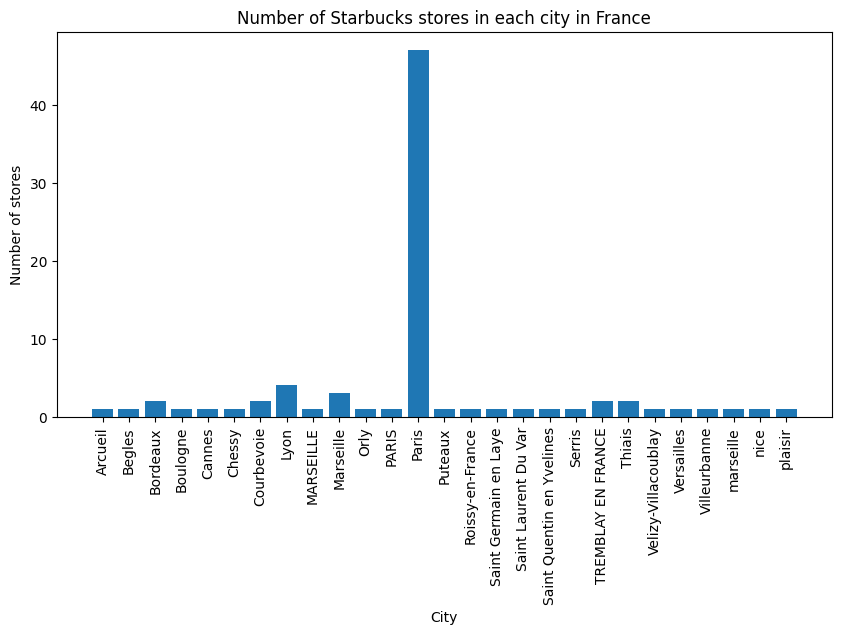

In [86]:
# The following code will execute the OPENAI-generated Python scripts. CHECK THE CODE FIRST!

try:
    exec(python_code)
except FileNotFoundError:
    print("FileNotFoundError: directory.csv not found in directory:", os.getcwd())
except Exception as e:
    print("Error:", e)